# Figure 9: Accuracy difference w/ and w/o Dropout in supervised learning.

[:simple-jupyter: :material-download:](../../paper_tables_and_figures/figure9_dropout_impact_supervised_setting/figure9_dropout_impact_supervised_setting.ipynb)

In [1]:
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df_with_dropout = pd.concat(
    [
        pd.read_parquet(
            "campaigns/ucdavis-icdm19/augmentation-at-loading-with-dropout/campaign_summary/1684447037/runsinfo_flowpic_dim_1500.parquet"
        ),
        pd.read_parquet(
            "campaigns/ucdavis-icdm19/augmentation-at-loading-with-dropout/campaign_summary/1684447037/runsinfo_flowpic_dim_32.parquet"
        ),
    ]
)

In [5]:
df_no_dropout = pd.concat(
    [
        pd.read_parquet(
            "campaigns/ucdavis-icdm19/augmentation-at-loading-suppress-dropout/campaign_summary/1684566558/runsinfo_flowpic_dim_1500.parquet"
        ),
        pd.read_parquet(
            "campaigns/ucdavis-icdm19/augmentation-at-loading-suppress-dropout/campaign_summary/1684566558/runsinfo_flowpic_dim_32.parquet"
        ),
    ]
)

In [7]:
df_tmp1 = df_with_dropout[
    [
        "flowpic_dim",
        "test_split_name",
        "aug_name",
        "seed",
        "split_index",
        "acc",
    ]
].rename(columns={"acc": "withdropout_acc"})
df_tmp2 = df_no_dropout[
    [
        "flowpic_dim",
        "test_split_name",
        "aug_name",
        "seed",
        "split_index",
        "acc",
    ]
].rename(columns={"acc": "nodropout_acc"})
df = pd.merge(
    df_tmp1,
    df_tmp2,
    on=[
        "flowpic_dim",
        "test_split_name",
        "aug_name",
        "seed",
        "split_index",
    ],
    suffixes=["withdropout_", "nodropout_"],
)

In [8]:
df = df.iloc[df["nodropout_acc"].dropna().index]

In [9]:
df["acc_diff"] = df["withdropout_acc"] - df["nodropout_acc"]

In [10]:
def compute_confidence_intervals(array, alpha=0.05):
    array = np.array(array)
    low, high = sms.DescrStatsW(array).tconfint_mean(alpha)
    mean = array.mean()
    ci = high - mean
    return ci

In [11]:
df_merged = df.groupby(["flowpic_dim", "test_split_name", "aug_name"]).agg(
    {"acc_diff": ["mean", "std", "count", "min", "max", compute_confidence_intervals]}
)
df_merged = df_merged.rename(
    columns={"compute_confidence_intervals": "confidence_interval"}
)
df_merged = df_merged.droplevel(0, axis=1)

In [12]:
df_merged

mean       std  count  \
flowpic_dim test_split_name aug_name                                        
32          test-human      changertt       8.835341e-01  3.421913     15   
                            colorjitter     1.285141e+00  5.750530     15   
                            horizontalflip -9.473903e-16  2.694058     15   
                            noaug          -1.204819e+00  3.020642     15   
                            packetloss     -8.032129e-01  2.215345     15   
                            rotate         -1.285141e+00  4.998116     15   
                            timeshift      -1.606426e-01  3.806343     15   
            test-script     changertt       3.555556e-01  0.791489     15   
                            colorjitter     5.777778e-01  1.256517     15   
                            horizontalflip -1.333333e-01  1.104105     15   
                            noaug          -6.222222e-01  0.990964     15   
                            packetloss      2.666667e-01  1.176489     15   
                            rotate         -1.777778e-01  0.924676     15   
                            timeshift       4.444444e-02  1.053088     15   
1500        test-human      changertt       7.228916e-01  2.762465     15   
                            colorjitter     1.847390e+00  2.446646     15   
                            horizontalflip  5.622490e-01  1.633450     15   
                            noaug          -1.204819e+00  3.727437     15   
                            packetloss      1.847390e+00  3.779005     15   
                            rotate         -5.622490e-01  2.488664     15   
                            timeshift      -1.124498e+00  1.903171     15   
            test-script     changertt       4.444444e-02  1.167460     15   
                            colorjitter     8.000000e-01  2.645151     15   
                            horizontalflip  7.555556e-01  1.668887     15   
                            noaug          -1.777778e-01  1.521625     15   
                            packetloss      7.555556e-01  2.150920     15   
                            rotate         -8.888889e-02  0.903842     15   
                            timeshift       0.000000e+00  0.666667     15   

                                                  min        max  \
flowpic_dim test_split_name aug_name                               
32          test-human      changertt       -6.024096   6.024096   
                            colorjitter     -8.433735  10.843373   
                            horizontalflip  -4.819277   6.024096   
                            noaug           -4.819277   3.614458   
                            packetloss      -3.614458   3.614458   
                            rotate         -12.048193   6.024096   
                            timeshift       -4.819277   6.024096   
            test-script     changertt       -0.666667   2.000000   
                            colorjitter     -2.000000   3.333333   
                            horizontalflip  -2.666667   1.333333   
                            noaug           -2.000000   0.666667   
                            packetloss      -2.000000   2.666667   
                            rotate          -1.333333   1.333333   
                            timeshift       -2.000000   2.000000   
1500        test-human      changertt       -4.819277   4.819277   
                            colorjitter     -1.204819   6.024096   
                            horizontalflip  -2.409639   3.614458   
                            noaug           -6.024096   7.228916   
                            packetloss      -3.614458   9.638554   
                            rotate          -3.614458   4.819277   
                            timeshift       -3.614458   2.409639   
            test-script     changertt       -1.333333   2.666667   
                            colorjitter     -3.333333   6.666667   
                            horizontalfli

/tmp/ipykernel_62018/2491681095.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(df_merged.loc[(flowpic_dim, test_split_name)].index), rotation=90)


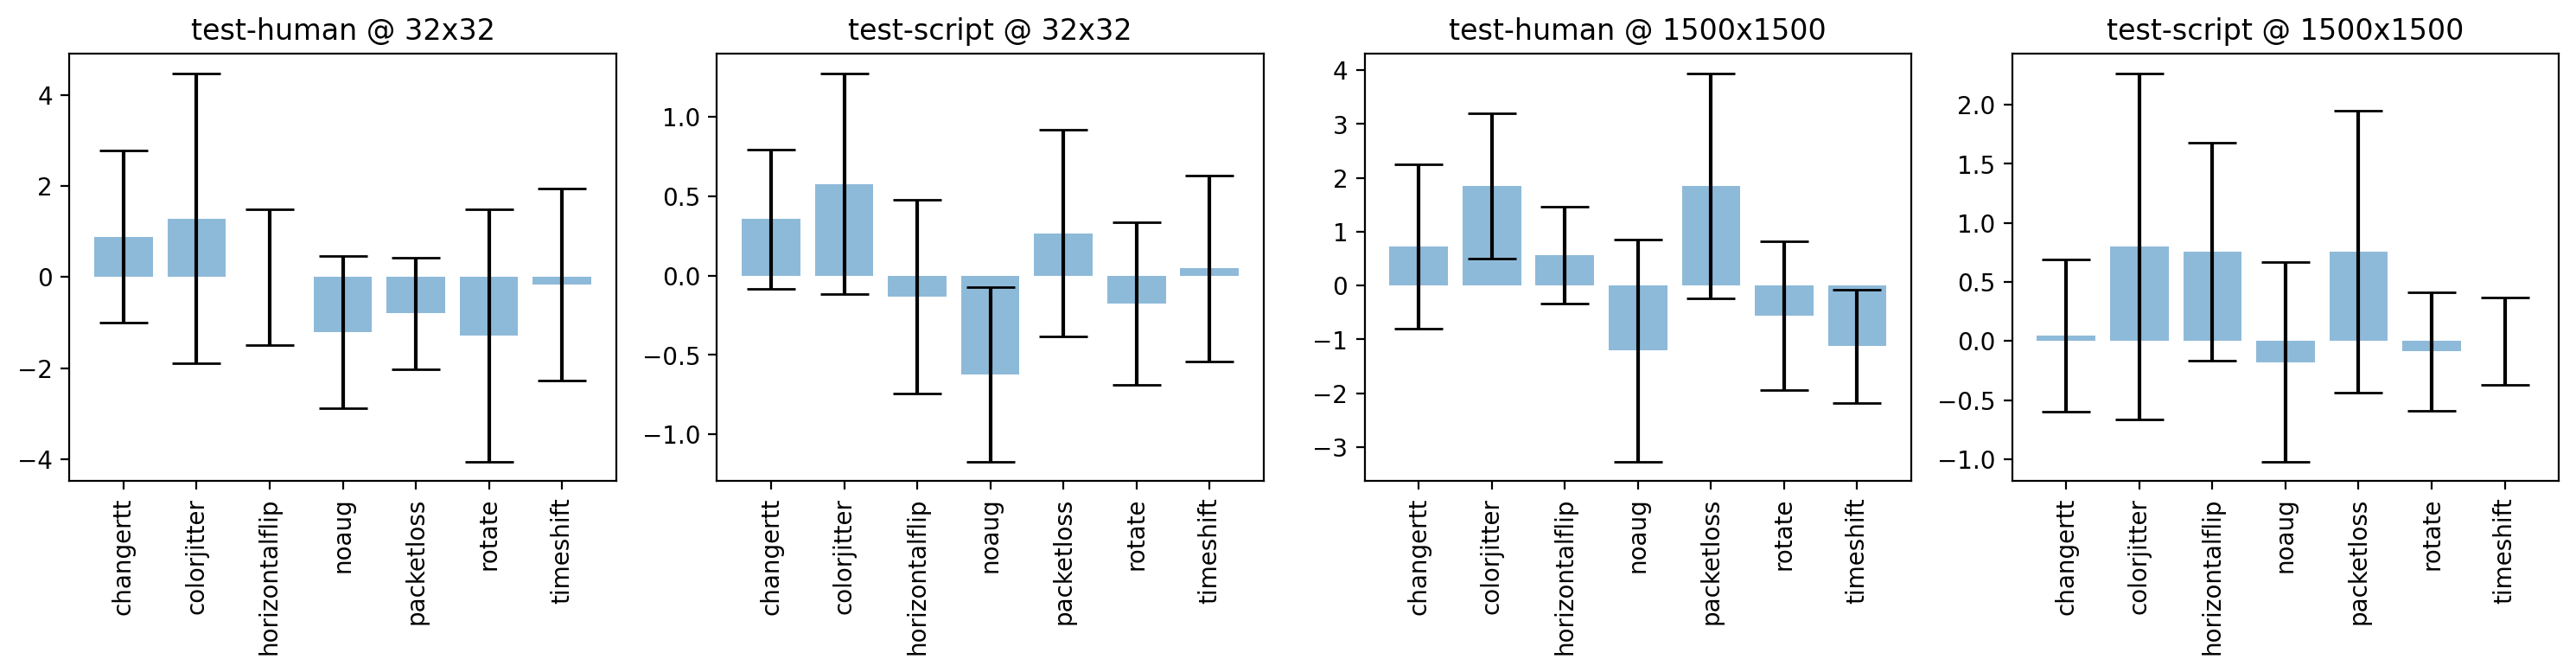

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

for ax, (flowpic_dim, test_split_name) in zip(
    axes.flatten(), itertools.product((32, 1500), ("test-human", "test-script"))
):
    # df_merged.loc[(flowpic_dim, test_split_name)]['mean'].plot(kind='bar', ax=ax)

    ax.bar(
        list(df_merged.loc[(flowpic_dim, test_split_name)].index),
        df_merged.loc[(flowpic_dim, test_split_name)]["mean"],
        yerr=df_merged.loc[(flowpic_dim, test_split_name)]["confidence_interval"],
        align="center",
        alpha=0.5,
        ecolor="black",
        capsize=10,
    )

    ax.set_title(f"{test_split_name} @ {flowpic_dim}x{flowpic_dim}")

    ax.set_xticklabels(
        list(df_merged.loc[(flowpic_dim, test_split_name)].index), rotation=90
    )


plt.tight_layout()